In [105]:
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

In [70]:
df = sns.load_dataset("iris")
iris = load_iris()

In [71]:
df.head()  # sepal_length, sepal_width, petal_length, petal_width

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [106]:
X= df.iloc[:,:-1]
y = iris.target # target values in numeric form

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 123)

In [108]:
print(X_train.shape,y_train.shape)

(120, 4) (120,)


## Post-Prunning

In [109]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [110]:
from sklearn.tree import plot_tree

[Text(0.5416666666666666, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [37, 44, 39]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.498\nsamples = 83\nvalue = [0, 44, 39]'),
 Text(0.5833333333333333, 0.8571428571428572, '  False'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.085\nsamples = 45\nvalue = [0, 43, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.045\nsamples = 43\nvalue = [0, 42, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.25, 0.21428571428571427, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue =

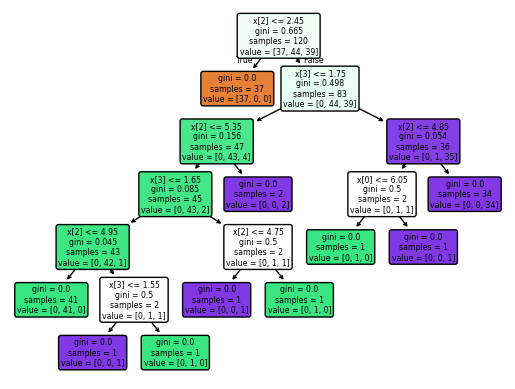

In [111]:
plot_tree(clf,filled = True,rounded = True)

In [112]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

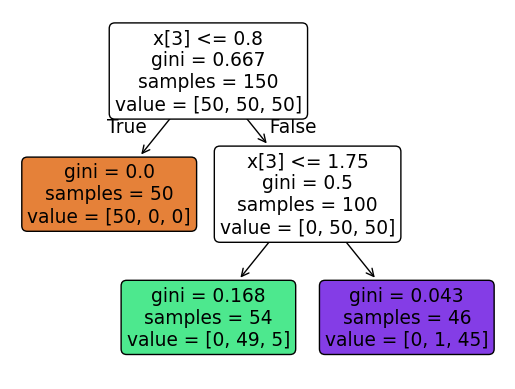

In [113]:
plot_tree(clf,filled = True,rounded = True)

## Pre-Prunning

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:

##preprunning

parameter = {
  'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto','sqrt','log2']
  }

In [116]:
tree_model = DecisionTreeClassifier()

In [117]:

cv = GridSearchCV(tree_model,param_grid = parameter,cv = 5,scoring = 'accuracy')

In [118]:
cv.fit(X_train,y_train)

c:\Python3.13\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python3.13\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python3.13\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Python3.13\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constraints(
    ~~~~~

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'log_loss'


In [120]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [125]:
y_pred = cv.predict(X_test)

In [127]:
score = accuracy_score(y_pred,y_test)
print(score)

0.9333333333333333


In [128]:
print(classification_report(y_pred ,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.75      0.86         8
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.92      0.92        30
weighted avg       0.95      0.93      0.93        30

